In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
columns=[
        'duration',
'protocol_type', 
'service' , 
'flag' ,
 'src_bytes' ,
 'dst_bytes',
'land',
'wrong_fragment',
 'urgent' ,
'hot',
'logged_in',
 'num_failed_logins',
 'num_compromised',
 'root_shell' ,
 'su_attempted' ,
 'num_root' ,
 'num_file_creations' ,
 'num_shells' ,
 'num_access_files',
'num_outbound_cmds' ,
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count' ,
 'serror_rate' ,
 'srv_serror_rate' ,
 'rerror_rate' ,
 'srv_rerror_rate' ,
 'same_srv_rate' ,
 'diff_srv_rate' ,
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count' ,
 'dst_host_same_srv_rate' ,
 'dst_host_diff_srv_rate' ,
 'dst_host_same_src_port_rate' ,
 'dst_host_srv_diff_host_rate' ,
 'dst_host_serror_rate' ,
 'dst_host_srv_serror_rate' ,
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate' ,
 'class'
]

In [ ]:
def Standardization(X_original):
  from sklearn.preprocessing import StandardScaler
  scaler1 = StandardScaler().fit(X)
  X_original=scaler1.transform(X)
  return X_original

In [ ]:
data=pd.read_csv("KDDTest+ Unwanted Data Removed.txt")

In [ ]:
data.columns=columns
data_copy=data.copy()

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,193.866699,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,94.036867,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for i in columns:
  if type(data[i][0])==type(data['protocol_type'][0]):
    print(i+" column has "+str(data[i].nunique())+" unique features")

protocol_type column has 3 unique features
service column has 64 unique features
flag column has 11 unique features
class column has 2 unique features


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_col=['protocol_type','service','flag','class']
new_categorical_columns=data[cat_col]
new_categorical_columns.head()

,protocol_type,service,flag,class
0,tcp,private,REJ,anomaly
1,tcp,ftp_data,SF,normal
2,icmp,eco_i,SF,anomaly
3,tcp,telnet,RSTO,anomaly
4,tcp,http,SF,normal


In [ ]:
new_cat_encoded=new_categorical_columns.apply(LabelEncoder().fit_transform)

In [ ]:
new_cat_encoded.head()

,protocol_type,service,flag,class
0,1,45,1,0
1,1,19,9,1
2,0,13,9,0
3,1,55,2,0
4,1,22,9,1


In [ ]:
data=data.drop(['flag','protocol_type','service'],axis=1)

In [ ]:
data=data.drop('class',axis=1)

In [ ]:
data=data.join(new_cat_encoded)

In [ ]:
data = data.reindex(columns, axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
2,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0
3,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0
4,0,1,22,9,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1


In [ ]:
Y=data['class']
X = data.drop('class',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
X = data.drop(['land','urgent','num_failed_logins','root_shell','su_attempted','num_root' ,'num_shells',
'num_access_files','num_outbound_cmds','is_host_login','serror_rate','srv_rerror_rate'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
2,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0
3,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0
4,0,1,22,9,267,14515,0,0,1,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,49,9,794,333,0,0,1,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1
22539,0,1,22,9,317,938,0,0,1,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1
22540,0,1,22,9,54540,8314,0,2,1,1,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0
22541,0,2,11,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1


In [ ]:
X.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
hot                            0
logged_in                      0
num_compromised                0
num_file_creations             0
is_guest_login                 0
count                          0
srv_count                      0
srv_serror_rate                0
rerror_rate                    0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
class                          0
dtype: int

In [ ]:
#Standardizing X 
X_test=Standardization(X)

In [ ]:
import pickle
filename='/content/kmeans_cluster.pkl'
infile = open(filename,'rb')
kmeans = pickle.load(infile)
Y_test_new=kmeans.predict(X_test)

In [ ]:
X_for_plot=np.hstack((X_test, np.atleast_2d(Y_test_new).T))
#X['labels']=Y_test_new.tolist()

In [ ]:
X_for_plot.shape

(22543, 31)

In [ ]:
centroids=kmeans.cluster_centers_

In [ ]:
count_0,count_1,count_2,count_3=0,0,0,0
for i in Y:
  if i==0:
    count_0+=1
  else:
    count_1+=1
print("When 2 classes")
print("Count of class 0 (anomaly) is "+str(count_0))
print("Count of class 1 (normal) is "+str(count_1))

count_0,count_1,count_2,count_3=0,0,0,0

cluster_0=pd.DataFrame(columns=columns)
cluster_1=pd.DataFrame(columns=columns)
cluster_2=pd.DataFrame(columns=columns)
cluster_3=pd.DataFrame(columns=columns)

for i in range(len(Y_test_new)):
  if Y_test_new[i]==0:
    cluster_0.loc[len(cluster_0.index)]=data_copy.iloc[i]
    count_0+=1
  elif Y_test_new[i] == 1:
    cluster_1.loc[len(cluster_1.index)]=data_copy.iloc[i]
    count_1+=1
  elif Y_test_new[i]==2:
    cluster_2.loc[len(cluster_2.index)]=data_copy.loc[i]
    count_2+=1
  else:
    cluster_3.loc[len(cluster_3.index)]=data_copy.iloc[i]
    count_3+=1
print("\nWhen 4 clusters:")
print("Count of class 0 is "+str(count_0))
print("Count of class 1 is "+str(count_1))
print("Count of class 2 is "+str(count_2))
print("Count of class 3 is "+str(count_3))

When 2 classes
Count of class 0 (anomaly) is 12832
Count of class 1 (normal) is 9711

When 4 clusters:
Count of class 0 is 2897
Count of class 1 is 14844
Count of class 2 is 4757
Count of class 3 is 45


In [ ]:
print("In cluster 0:")
print("Count of anomaly(0) is "+str(cluster_0['class'].value_counts()[0]))
print("Count of normal(1) is "+str(cluster_0['class'].value_counts()[1]))
print("\nIn cluster 1:")
print("Count of anomaly is "+str(cluster_1['class'].value_counts()[0]))
print("Count of normal is "+str(cluster_1['class'].value_counts()[1]))
print("\nIn cluster 2:")
print("Count of anomaly is "+str(cluster_2['class'].value_counts()[0]))
print("Count of normal is "+str(cluster_2['class'].value_counts()[1]))
print("\nIn cluster 3:")
print("Count of anomaly is "+str(cluster_3['class'].value_counts()[0]))
print("Count of normal is "+str(cluster_3['class'].value_counts()[1]))

In cluster 0:
Count of anomaly(0) is 2877
Count of normal(1) is 20

In cluster 1:
Count of anomaly is 9573
Count of normal is 5271

In cluster 2:
Count of anomaly is 4681
Count of normal is 76

In cluster 3:
Count of anomaly is 42
Count of normal is 3


In [ ]:
cluster_0['label']=0
cluster_1['label']=1
cluster_2['label']=2
cluster_3['label']=3

In [ ]:
normal=pd.DataFrame(columns=cluster_0.columns)
anomaly=pd.DataFrame(columns=cluster_0.columns)

In [ ]:
anomaly=cluster_0[cluster_0['class']=='anomaly']
anomaly=anomaly.append(cluster_1[cluster_1['class']=='anomaly'],ignore_index=True)
anomaly=anomaly.append(cluster_2[cluster_2['class']=='anomaly'],ignore_index=True)
anomaly=anomaly.append(cluster_3[cluster_3['class']=='anomaly'],ignore_index=True)

normal=cluster_0[cluster_0['class']=='normal']
normal=normal.append(cluster_1[cluster_1['class']=='normal'],ignore_index=True)
normal=normal.append(cluster_2[cluster_2['class']=='normal'],ignore_index=True)
normal=normal.append(cluster_3[cluster_3['class']=='normal'],ignore_index=True)

print("count in normal: "+str(normal.shape[0]))
print("count in anomaly: "+str(anomaly.shape[0]))

count in normal: 9711
count in anomaly: 12832


In [ ]:
max_val=[cluster_0.loc[cluster_0['class']=='anomaly'].protocol_type.mode()[0],
        cluster_0.loc[cluster_0['class']=='anomaly'].service.mode()[0],
        cluster_0.loc[cluster_0['class']=='anomaly'].flag.mode()[0],
        cluster_0.loc[cluster_0['class']=='anomaly'].src_bytes.mean(),
        cluster_0.loc[cluster_0['class']=='anomaly'].dst_bytes.mean(),
         cluster_0.loc[cluster_0['class']=='anomaly'].num_file_creations.mean(),
         cluster_0.loc[cluster_0['class']=='anomaly'].num_failed_logins.mean(),
         cluster_0.loc[cluster_0['class']=='anomaly'].wrong_fragment.mode()[0],
        
        cluster_0.loc[cluster_0['class']=='normal'].protocol_type.mode()[0],
        cluster_0.loc[cluster_0['class']=='normal'].service.mode()[0],
        cluster_0.loc[cluster_0['class']=='normal'].flag.mode()[0],
        cluster_0.loc[cluster_0['class']=='normal'].src_bytes.mean(),
        cluster_0.loc[cluster_0['class']=='normal'].dst_bytes.mean(),
         cluster_0.loc[cluster_0['class']=='normal'].num_file_creations.mean(),
         cluster_0.loc[cluster_0['class']=='normal'].num_failed_logins.mean(),
         cluster_0.loc[cluster_0['class']=='normal'].wrong_fragment.mode()[0]
         ]

print("In cluster 0\n\nthe anomaly data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}\nnum file creations {}\nnum_failed_logins: {}\nwrong fragments: {}".format(max_val[0],max_val[1],max_val[2],max_val[3],max_val[4],max_val[5],max_val[6],max_val[7]))
print("\nthe normal data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}\nnum file creations {}\nnum_failed_logins: {}\nwrong fragments: {}".format(max_val[8],max_val[9],max_val[10],max_val[11],max_val[12],max_val[13],max_val[14],max_val[15]))

In cluster 0

the anomaly data majorly used tcp protocol
service type: private
flag: S0
src_bytes: 5.102884949600278
dst_bytes: 43.585679527285365
num file creations 0.006604101494612443
num_failed_logins: 0.001737921445950643
wrong fragments: 0

the normal data majorly used tcp protocol
service type: private
flag: SF
src_bytes: 17550.1
dst_bytes: 66361.15
num file creations 0.0
num_failed_logins: 0.0
wrong fragments: 0


In [ ]:
max_val=[cluster_1.loc[cluster_1['class']=='anomaly'].protocol_type.mode()[0],
        cluster_1.loc[cluster_1['class']=='anomaly'].service.mode()[0],
        cluster_1.loc[cluster_1['class']=='anomaly'].flag.mode()[0],
         cluster_1.loc[cluster_1['class']=='anomaly'].src_bytes.mean(),
        cluster_1.loc[cluster_1['class']=='anomaly'].dst_bytes.mean(),
         cluster_1.loc[cluster_1['class']=='anomaly'].num_file_creations.mean(),
         cluster_1.loc[cluster_1['class']=='anomaly'].num_failed_logins.mean(),
         cluster_1.loc[cluster_1['class']=='anomaly'].wrong_fragment.mode()[0],
         
        cluster_1.loc[cluster_1['class']=='normal'].protocol_type.mode()[0],
        cluster_1.loc[cluster_1['class']=='normal'].service.mode()[0],
        cluster_1.loc[cluster_1['class']=='normal'].flag.mode()[0],
         cluster_1.loc[cluster_1['class']=='normal'].src_bytes.mean(),
        cluster_1.loc[cluster_1['class']=='normal'].dst_bytes.mean(),
         cluster_1.loc[cluster_1['class']=='normal'].num_file_creations.mean(),
         cluster_1.loc[cluster_1['class']=='normal'].num_failed_logins.mean(),
         cluster_1.loc[cluster_1['class']=='normal'].wrong_fragment.mode()[0]]

print("In cluster 1\n\nthe anomaly data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}\nnum file creations {}\nnum_failed_logins: {}\nwrong fragments: {}".format(max_val[0],max_val[1],max_val[2],max_val[3],max_val[4],max_val[5],max_val[6],max_val[7]))
print("\nthe normal data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}\nnum file creations {}\nnum_failed_logins: {}\nwrong fragments: {}".format(max_val[8],max_val[9],max_val[10],max_val[11],max_val[12],max_val[13],max_val[14],max_val[15]))

In cluster 1

the anomaly data majorly used tcp protocol
service type: http
flag: SF
src_bytes: 39785.7197875166
dst_bytes: 975.8905331056726
num file creations 0.01271106051982546
num_failed_logins: 0.08708025042686397
wrong fragments: 0

the normal data majorly used tcp protocol
service type: http
flag: SF
src_bytes: 2527.2667920192207
dst_bytes: 4075.357568160451
num file creations 0.0006267627702914447
num_failed_logins: 0.0008356836937219263
wrong fragments: 0


In [ ]:
max_val=[cluster_2.loc[cluster_2['class']=='anomaly'].protocol_type.mode()[0],
        cluster_2.loc[cluster_2['class']=='anomaly'].service.mode()[0],
        cluster_2.loc[cluster_2['class']=='anomaly'].flag.mode()[0],
         cluster_2.loc[cluster_2['class']=='anomaly'].src_bytes.mean(),
        cluster_2.loc[cluster_2['class']=='anomaly'].dst_bytes.mean(),
        cluster_2.loc[cluster_2['class']=='anomaly'].num_file_creations.mean(),
         cluster_2.loc[cluster_2['class']=='anomaly'].num_failed_logins.mean(),
         cluster_2.loc[cluster_2['class']=='anomaly'].wrong_fragment.mode()[0],

        cluster_2.loc[cluster_2['class']=='normal'].protocol_type.mode()[0],
        cluster_2.loc[cluster_2['class']=='normal'].service.mode()[0],
        cluster_2.loc[cluster_2['class']=='normal'].flag.mode()[0],
         cluster_2.loc[cluster_2['class']=='normal'].src_bytes.mean(),
        cluster_2.loc[cluster_2['class']=='normal'].dst_bytes.mean(),
         cluster_2.loc[cluster_2['class']=='normal'].num_file_creations.mean(),
         cluster_2.loc[cluster_2['class']=='normal'].num_failed_logins.mean(),
         cluster_2.loc[cluster_2['class']=='normal'].wrong_fragment.mode()[0]]

print("In cluster 2\n\nthe anomaly data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}\nnum file creations {}\nnum_failed_logins: {}\nwrong fragments: {}".format(max_val[0],max_val[1],max_val[2],max_val[3],max_val[4],max_val[5],max_val[6],max_val[7]))
print("\nthe normal data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}\nnum file creations {}\nnum_failed_logins: {}\nwrong fragments: {}".format(max_val[8],max_val[9],max_val[10],max_val[11],max_val[12],max_val[13],max_val[14],max_val[15]))

In cluster 2

the anomaly data majorly used tcp protocol
service type: private
flag: REJ
src_bytes: 10.12305063020722
dst_bytes: 117.22324289681691
num file creations 0.0
num_failed_logins: 0.002563554795983764
wrong fragments: 0

the normal data majorly used tcp protocol
service type: other
flag: RSTR
src_bytes: 90.03947368421052
dst_bytes: 581.5526315789474
num file creations 0.0
num_failed_logins: 0.0
wrong fragments: 0


In [ ]:
max_val=[cluster_3.loc[cluster_3['class']=='anomaly'].protocol_type.mode()[0],
        cluster_3.loc[cluster_3['class']=='anomaly'].service.mode()[0],
        cluster_3.loc[cluster_3['class']=='anomaly'].flag.mode()[0],
         cluster_3.loc[cluster_3['class']=='anomaly'].src_bytes.mean(),
        cluster_3.loc[cluster_3['class']=='anomaly'].dst_bytes.mean(),
         cluster_3.loc[cluster_3['class']=='anomaly'].num_file_creations.mean(),
         cluster_3.loc[cluster_3['class']=='anomaly'].num_failed_logins.mean(),
         cluster_3.loc[cluster_3['class']=='anomaly'].wrong_fragment.mode()[0],
         
        cluster_3.loc[cluster_3['class']=='normal'].protocol_type.mode()[0],
        cluster_3.loc[cluster_3['class']=='normal'].service.mode()[0],
        cluster_3.loc[cluster_3['class']=='normal'].flag.mode()[0],
         cluster_3.loc[cluster_3['class']=='normal'].src_bytes.mean(),
        cluster_3.loc[cluster_3['class']=='normal'].dst_bytes.mean(),
         cluster_3.loc[cluster_3['class']=='normal'].num_file_creations.mean(),
         cluster_3.loc[cluster_3['class']=='normal'].num_failed_logins.mean(),
         cluster_3.loc[cluster_3['class']=='normal'].wrong_fragment.mode()[0]]

print("In cluster 3\n\nthe anomaly data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}\nnum file creations {}\nnum_failed_logins: {}\nwrong fragments: {}".format(max_val[0],max_val[1],max_val[2],max_val[3],max_val[4],max_val[5],max_val[6],max_val[7]))
print("\nthe normal data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}\nnum file creations {}\nnum_failed_logins: {}\nwrong fragments: {}".format(max_val[8],max_val[9],max_val[10],max_val[11],max_val[12],max_val[13],max_val[14],max_val[15]))

In cluster 3

the anomaly data majorly used tcp protocol
service type: telnet
flag: SF
src_bytes: 2875.6666666666665
dst_bytes: 28442.0
num file creations 1.6666666666666667
num_failed_logins: 0.3333333333333333
wrong fragments: 0

the normal data majorly used tcp protocol
service type: ftp
flag: SF
src_bytes: 534.2142857142857
dst_bytes: 1493.0
num file creations 2.380952380952381
num_failed_logins: 0.07142857142857142
wrong fragments: 0


In [ ]:
import seaborn as sns

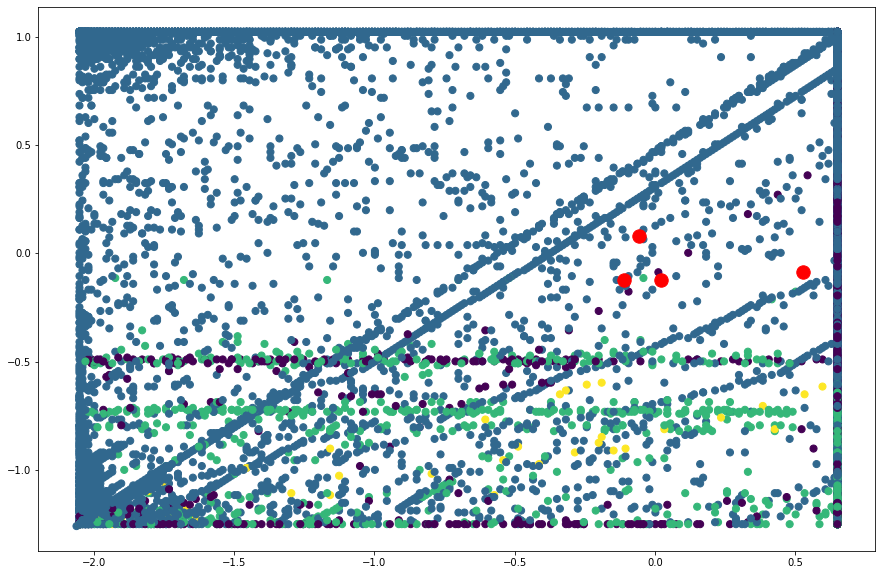

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.scatter(X_for_plot[:,19],X_for_plot[:,20], c=Y_test_new, s=50, cmap='viridis') # plotting x values against 4 clusters
plt.scatter(centroids[:,0] , centroids[:,1] , s = 180, color = 'r')
plt.show()

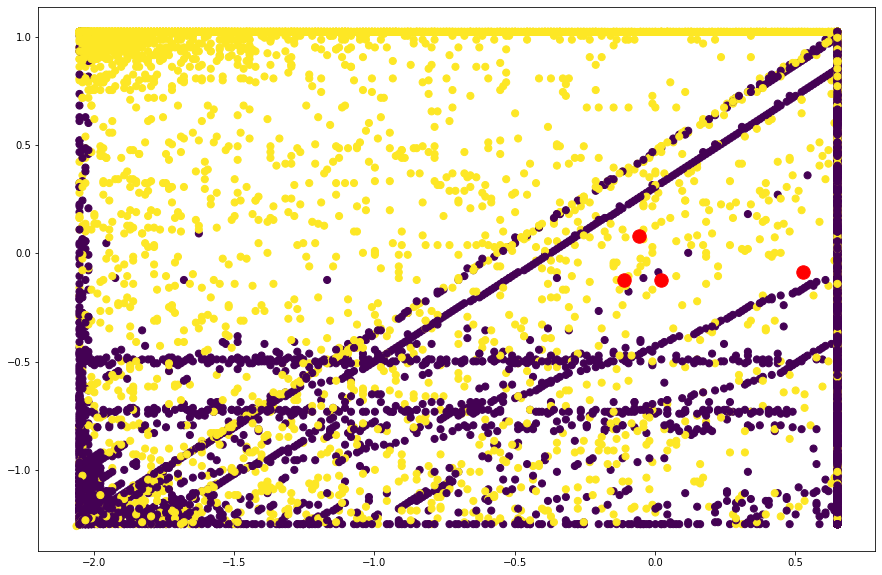

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.scatter(X_for_plot[:, 19],X_for_plot[:, 20], c=Y, s=50, cmap='viridis') # plotting x values against class 0 or 1
plt.scatter(centroids[:,0] , centroids[:,1] , s = 180, color = 'r') 
plt.show()

In [ ]:
filename='/content/xgboost_kmeans.pkl'
infile = open(filename,'rb')
xgb_multi = pickle.load(infile)
Y_pred=xgb_multi.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test_new)

0.9442398970855698

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_new,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2897
           1       0.96      0.96      0.96     14844
           2       0.98      0.98      0.98      4757
           3       0.07      0.96      0.12        45

    accuracy                           0.94     22543
   macro avg       0.75      0.93      0.74     22543
weighted avg       0.97      0.94      0.95     22543



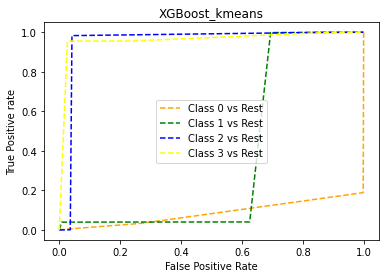

In [ ]:
fpr = {}
tpr = {}
thresh ={}
for i in range(4):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_new,Y_pred, pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('XGBoost_kmeans')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
# auc_score=roc_auc_score(Y_test_new, Y_pred, multi_class='ovr') # this is throwing some error

In [ ]:
filename='/content/LR_kmeans.pkl'
infile = open(filename,'rb')
LR_multi = pickle.load(infile)
Y_pred=LR_multi.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test_new)

0.9811915006875749

In [ ]:
print(classification_report(Y_test_new,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2897
           1       0.99      0.98      0.99     14844
           2       1.00      0.99      1.00      4757
           3       0.10      0.56      0.18        45

    accuracy                           0.98     22543
   macro avg       0.77      0.87      0.78     22543
weighted avg       0.99      0.98      0.98     22543



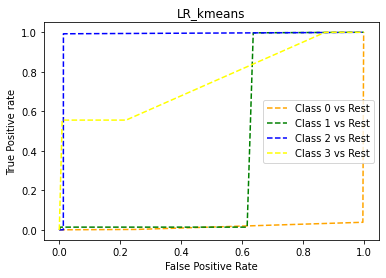

In [ ]:
fpr = {}
tpr = {}
thresh ={}
for i in range(4):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_new,Y_pred, pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('LR_kmeans')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
filename='/content/svm_kmeans.pkl'
infile = open(filename,'rb')
svm_multi = pickle.load(infile)
Y_pred=svm_multi.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test_new)

0.9704564609856718

In [ ]:
print(classification_report(Y_test_new,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2897
           1       0.99      0.97      0.98     14844
           2       1.00      0.99      1.00      4757
           3       0.08      0.96      0.15        45

    accuracy                           0.97     22543
   macro avg       0.77      0.97      0.77     22543
weighted avg       0.99      0.97      0.98     22543



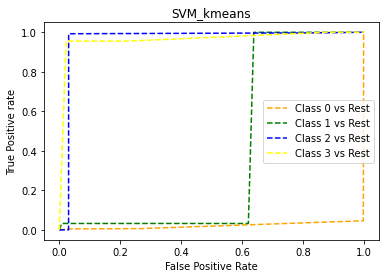

In [ ]:
fpr = {}
tpr = {}
thresh ={}
for i in range(4):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_new,Y_pred, pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('SVM_kmeans')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

For CNN Model testing

In [ ]:
import os
import cv2
import keras
import tensorflow
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization

from keras.models import model_from_json

In [ ]:
Y_test_new = to_categorical(Y_test_new)

In [ ]:
def convertToImage(X_original):
  x=list()
  count=0
  for i in X_original:
    array = np.reshape(i, (5,6))
    print(count)
    count+=1
    img=np.reshape(array,(array.shape[0],array.shape[1],1))
    x.append(img)
  X=np.array(x)
  return X

In [ ]:
X_images=convertToImage(X_test)

In [ ]:
def loadModels(datadir,weightFile):
  json_file = open(datadir, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
# load weights into new model
  loaded_model.load_weights(weightFile)
  print("Loaded model from disk")
  return loaded_model


In [ ]:
CNN=loadModels('/content/CNN_kmeans.json','CNN_kmeans.h5')

Loaded model from disk


In [ ]:
y_pred=CNN.predict(X_images)

In [ ]:
y_pred

array([[4.3220819e-08, 2.4138290e-11, 1.0000000e+00, 1.1926221e-09],
       [3.0025153e-35, 1.0000000e+00, 1.7331828e-33, 9.7616531e-22],
       [0.0000000e+00, 1.0000000e+00, 5.9640411e-36, 2.0206871e-23],
       ...,
       [3.8666883e-29, 1.0000000e+00, 3.2890995e-28, 9.4735678e-13],
       [1.0608809e-33, 1.0000000e+00, 4.3365791e-32, 2.2035957e-19],
       [2.4850358e-06, 2.3136386e-10, 9.9999750e-01, 2.6112772e-09]],
      dtype=float32)

In [ ]:
import numpy as np
class_labels = np.argmax(y_pred, axis=1)
Y_test_new = np.argmax(Y_test_new, axis=1)

In [ ]:
class_labels

array([2, 1, 1, ..., 1, 1, 2])

In [ ]:
Y_test_new

array([2, 1, 1, ..., 1, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(class_labels,Y_test_new)

0.9464578804950539

ACCURACY:

1.XGBOOST=94.5%

2.LR=98.1%

3.SVM=97.05%

4.CNN=95.0%